In [51]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt
import time
import scipy

## Took the input of angles in degrees and gives out T matrix

In [66]:
# Implementing class/library for forward kinematics 
class Forward:
    
    def __init__(self, theta1,theta2,theta3,theta4,theta5,theta6):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
        
    # This is transformation from frame 1 to 0     

    def _0T1(self):
        x_in = np.radians(self.theta1)
        d1 = 1
        a1 = 2
        
        _T1 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(-m.pi/2)*m.sin(m.pi/2+x_in), a1*m.cos(m.pi/2)  ],[ m.sin(m.pi/2+x_in) , m.cos(-m.pi/2)*m.cos(m.pi/2+x_in), -m.sin(-m.pi/2)*m.cos(m.pi/2+x_in), a1*m.sin(m.pi/2) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d1 ],[ 0 , 0, 0, 1]])
       
        return _T1
    
    # This is transformation from frame 2 to 1    
    def _1T2(self):
        x_in = np.radians(self.theta2)
        a2 = 0
        
        _T2 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(0)*m.sin(m.pi/2+ x_in), m.sin(0)*m.sin(m.pi/2+x_in), a2*m.cos(m.pi/2) ],[ m.sin(m.pi/2+x_in) , m.cos(0)*m.cos(m.pi/2+x_in), -m.sin(0)*m.cos(m.pi/2+x_in), a2*m.sin(m.pi/2) ],[ 0 , m.sin(0), m.cos(0), 0 ],[ 0 , 0, 0, 1]]) 
        return _T2 
    
    # This is transformation from frame 3 to 2
    def _2T3(self):
        x_in = np.radians(self.theta3)
        a3= 1.5
        d3 = 2
        
        _T3 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(m.pi/2)*m.sin(m.pi/2+x_in), a3*m.cos(-m.pi/2) ],[ m.sin(-m.pi/2+x_in) , m.cos(m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(m.pi/2)*m.cos(-m.pi/2+x_in), a3*m.sin(-m.pi/2) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d3 ],[ 0 , 0, 0, 1]])
        return _T3
    
    # This is transformation from frame 4 to 3
    def _3T4(self):
        x_in = np.radians(self.theta4)
        d4 = 1.1
        a4 = 2
        _T4 = np.array([[m.cos( x_in ), -m.cos(-m.pi/2)*m.sin( x_in), m.sin(-m.pi/2)*m.sin(x_in), a4*m.cos(0) ],[ m.sin(x_in) , m.cos(-m.pi/2)*m.cos(x_in), -m.sin(-m.pi/2)*m.cos(x_in), a4*m.sin(0) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d4 ],[ 0 , 0, 0, 1]])
        return _T4
    
    # This is transformation from frame 5 to 4
    def _4T5(self):
        x_in = np.radians(self.theta5)
        a5 = 2
        d5 = 0.8
        _T5 = np.array([[m.cos(-m.pi + x_in ), -m.cos(m.pi/2)*m.sin(-m.pi+ x_in), m.sin(m.pi/2)*m.sin(-m.pi +x_in), a5*m.cos(-m.pi/2) ],[ m.sin(-m.pi+x_in) , m.cos(m.pi/2)*m.cos(-m.pi+x_in), -m.sin(m.pi/2)*m.cos(-m.pi+x_in), a5*m.sin(-m.pi/2) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d5 ],[ 0 , 0, 0, 1]])
        return _T5
    
    def _5T6(self):
        x_in = self.theta6
        a6 = 0
        d6 = 10
        _T6 = np.array([[m.cos(x_in ), -m.cos(m.pi/2)*m.sin( x_in), m.sin(m.pi/2)*m.sin(x_in), a6*m.cos(x_in) ],[ m.sin(x_in) , m.cos(m.pi/2)*m.cos(x_in), -m.sin(m.pi/2)*m.cos(x_in), a6*m.sin(x_in) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d6 ],[ 0 , 0, 0, 1]])
        return _T6

    
        
    def _jointpos(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0
        return T1()[:,3] ,op1[:,3], op2[:,3], op3[:,3], op4[:,3]
    
    def _jointsvec(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0 
        return T1()[:,2], op1[:,2], op2[:,2], op3[:,2], op4[:,2], op5[:,2]
        
    def _endeff(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
       
        return op5
    
    def _ori(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
        theta_x = np.degrees(np.arctan2(op5[2,1],op5[2,2]))
        theta_y = np.degrees(np.arctan2(op5[2,0], m.sqrt((op5[2,1])**2+ (op5[2,2])**2)))
        theta_z = np.degrees(np.arctan2(op5[1,0],op5[0,0]))
        
        return np.array([theta_x, theta_y, theta_z]) 
    
    def _Jacobian(self):
       
        zs =  Forward._jointsvec(self)
        end_effector_position = Forward._endeff(self)
        p0 = end_effector_position[:,3][:3] 
        p1 = end_effector_position[:,3][:3] - zs[0][:3] #p6 - p1
        p2 = end_effector_position[:,3][:3] - zs[1][:3] #p6 - p2
        p3 = end_effector_position[:,3][:3] - zs[2][:3]#p6 - p3
        p4 = end_effector_position[:,3][:3] - zs[3][:3] #p6 - p4
        p5 = end_effector_position[:,3][:3] - zs[4][:3] 
        
        entry1 = np.cross(zs[0][:3],p0)
        entry2 = np.cross(zs[1][:3],p1)
        entry3 = np.cross(zs[2][:3],p2)
        entry4 = np.cross(zs[3][:3],p3)
        entry5 = np.cross(zs[4][:3],p4)
        entry6 = np.cross(zs[5][:3],p5)
        
        e1 = np.expand_dims(entry1,axis=0).transpose()
        E1 = np.append(e1,zs[0][:3])

        e2 = np.expand_dims(entry2, axis=0).transpose()
        E2 = np.append(e2,zs[1][:3])

        e3 = np.expand_dims(entry3, axis=0).transpose()
        E3 = np.append(e3,zs[2][:3])

        e4 = np.expand_dims(entry4, axis=0).transpose()
        E4 = np.append(e4,zs[3][:3])

        e5 = np.expand_dims(entry5, axis=0).transpose()
        E5 = np.append(e5,zs[4][:3])

        e6 = np.expand_dims(entry6, axis=0).transpose()
        E6 = np.append(e6,zs[5][:3])

        J = np.column_stack((E1,E2,E3,E4,E5,E6))
        
        return J 
        
        
    def _Firstori(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
        theta_x = np.degrees(np.arctan2(T1()[2,1],T1()[2,2]))
        theta_y = np.degrees(np.arctan2(T1()[2,0], m.sqrt((T1()[2,1])**2+ (T1()[2,2])**2)))
        theta_z = np.degrees(np.arctan2(T1()[1,0],T1()[0,0]))
        
        return theta_x, theta_y, theta_z , op2
    
    



In [27]:
class Inverse(Forward):
    def __init__(self,theta1,theta2,theta3,theta4,theta5,theta6,theta7,pos1,pos2,pos3):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
        self.theta7 = theta7
        self.pos1 = pos1
        self.pos2 = pos2
        self.pos3 = pos3
        
           
    def _Jacobian(self):
        zs =  Forward._jointsvec(self)
        end_effector_position = Forward._endeff(self)
        Jacobian = Forward._Jacobian(self)
        J_inv = np.linalg.inv(Jacobian)

 
        end_effector_position = Forward._endeff(self)[:,3]
        current_position = np.array([end_effector_position[0], end_effector_position[1], end_effector_position[2]])
        Current_Position = np.expand_dims(current_position, axis =0).transpose()
        
        desired_pos = np.array([self.pos1,self.pos2,self.pos3])
        
    def _desiredT(self):
        x_in = self.theta7
        a7 = 2
        d7 = 2
        _Tdesired = np.array([[m.cos(x_in ), -m.cos(m.pi/2)*m.sin( x_in), m.sin(m.pi/2)*m.sin(x_in), a7*m.cos(x_in) ],[ m.sin(x_in) , m.cos(m.pi/2)*m.cos(x_in), -m.sin(m.pi/2)*m.cos(x_in), a7*m.sin(x_in) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d7 ],[ 0 , 0, 0, 1]])
        return _Tdesired
       
        

        
ex = Inverse(10,10,10,10,10,10,12,1,2,3)
ex._Jacobian()
T7 = ex._desiredT()

In [67]:

# Instantiation of class 
test = Forward(0,0,0,0,0,0)

# Function to get final position of frame 5 based on forward kinematics 
joint = test._jointpos()
end = test._endeff()[:,3]
oi = test._ori()
test._Firstori()
# = test._jointsvec()
#rint(J.shape)
cobian = test._Jacobian()
cobian


array([[ 1.46957616e-16,  1.46957616e-16,  5.50000000e+00,
         2.08189956e-16, -5.50000000e+00, -7.59281015e-16],
       [ 7.90000000e+00,  7.90000000e+00,  1.80000000e+00,
         8.90000000e+00, -1.80000000e+00, -6.90000000e+00],
       [-5.50000000e+00, -5.50000000e+00, -4.53119316e-16,
        -5.50000000e+00, -4.40872848e-16,  5.50000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.22464680e-16,
        -1.00000000e+00, -1.23259516e-32,  1.00000000e+00],
       [ 6.12323400e-17,  6.12323400e-17,  1.22464680e-16,
         6.12323400e-17, -2.44929360e-16, -6.12323400e-17],
       [ 6.12323400e-17,  6.12323400e-17, -1.00000000e+00,
         6.12323400e-17,  1.00000000e+00,  6.12323400e-17]])

In [5]:
# Trying to plot workspace of the robot

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
a1 = np.arange(1,360,5)
a2 = np.arange(1,360,5)
a3 = np.arange(1,360,5)
a4 = np.arange(1,360,5)
a5 = np.arange(1,360,5)
a6 = np.arange(1,360,5)
tic = time.time()
for i in range(72):

    test = Forward(a1[i],a2[i],a3[i],a4[i],a5[i],0)
    j = test._jointpos()
    f = test._endeff()[:,3][:3]
    j1 = j[0][:3]
    j2 = j[1][:3]
    j3 = j[2][:3]
    j4 = j[3][:3]
    j5 = j[4][:3]
    list1.insert(i,j1)
    list2.insert(i,j2)
    list3.insert(i,j3)
    list4.insert(i,j4)
    list5.insert(i,j5)
    list6.insert(i,f)
    
    print('One step done next',i)
    
toc = time.time()
print(toc-tic)

One step done next 0
One step done next 1
One step done next 2
One step done next 3
One step done next 4
One step done next 5
One step done next 6
One step done next 7
One step done next 8
One step done next 9
One step done next 10
One step done next 11
One step done next 12
One step done next 13
One step done next 14
One step done next 15
One step done next 16
One step done next 17
One step done next 18
One step done next 19
One step done next 20
One step done next 21
One step done next 22
One step done next 23
One step done next 24
One step done next 25
One step done next 26
One step done next 27
One step done next 28
One step done next 29
One step done next 30
One step done next 31
One step done next 32
One step done next 33
One step done next 34
One step done next 35
One step done next 36
One step done next 37
One step done next 38
One step done next 39
One step done next 40
One step done next 41
One step done next 42
One step done next 43
One step done next 44
One step done next 4

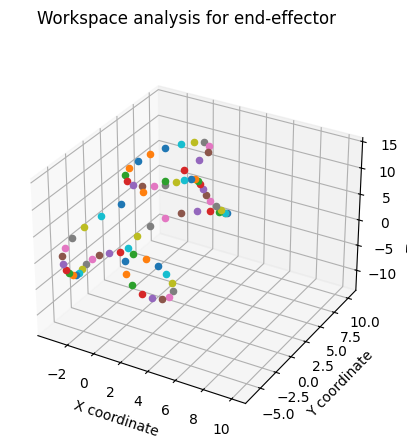

In [6]:
plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(10, 10, 10, 'blue')
for i in range(72):
    ax.scatter3D(list6[i][0],list6[i][1],list6[i][2])
    plt.suptitle('Workspace analysis for end-effector')
    plt.xlabel('X coordinate')
    
    plt.ylabel('Y coordinate')
    ax.set_zlabel('Z coordinate')




In [18]:
j[0]

array([1.2246468e-16, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00])

# Inverse kinematics using Newton-Raphson method

### Finding the jacobian using geometric method

In [7]:
# First finding jacobian

jangles = test._jointsvec()
z0 = jangles[0][:3]
z1 = jangles[1][:3]
z2 = jangles[2][:3]
z3 = jangles[3][:3]
z4 = jangles[4][:3]
z5 = jangles[5][:3]

# joint positions (P)
p0 = end[:3] 
p1 = end[:3] - joint[0][:3] #p6 - p1
p2 = end[:3] - joint[1][:3] #p6 - p2
p3 = end[:3] - joint[2][:3]#p6 - p3
p4 = end[:3] - joint[3][:3] #p6 - p4
p5 = end[:3] - joint[4][:3] #p6 - p5

entry1 = np.cross(z0,p0)
entry2 = np.cross(z1,p1)
entry3 = np.cross(z2,p2)
entry4 = np.cross(z3,p3)
entry5 = np.cross(z4,p4)
entry6 = np.cross(z5,p5)

# Stacking the vectors to find the jacobian matrix
e1 = np.expand_dims(entry1,axis=0).transpose()
E1 = np.append(e1,z0)

e2 = np.expand_dims(entry2, axis=0).transpose()
E2 = np.append(e2,z1)

e3 = np.expand_dims(entry3, axis=0).transpose()
E3 = np.append(e3,z2)

e4 = np.expand_dims(entry4, axis=0).transpose()
E4 = np.append(e4,z3)

e5 = np.expand_dims(entry5, axis=0).transpose()
E5 = np.append(e5,z4)

e6 = np.expand_dims(entry6, axis=0).transpose()
E6 = np.append(e6,z5)

J = np.column_stack((E1,E2,E3,E4,E5,E6))

J[2,2]


2.332199668865038e-16

In [8]:
# Implementing the Newton-Raphson method, now that I have the jacobian matrix
posori = np.array([end[0],end[1],end[2]])
POSORI = np.expand_dims(posori, axis =0).transpose()
print(POSORI)
st1 = 10
st2 = 10
st3 = 10
st4 = 10
st5 = 10
st6 = 10
j=0

[[-1.88846982]
 [ 1.98971581]
 [ 7.63376192]]


In [9]:
Error_P = [500]
#while Err_theta>3:


for i in range(0,100):

    test2 = Forward(st1,st2,st3,st4,st5,st6)
    end2  = test2._endeff()[:,3]
    joint2 = test2._jointpos()
    ori =test2._ori()
    orientation = np.array(ori)
    OR = np.expand_dims(orientation,axis=0).transpose()


    jangles = test2._jointsvec()
    z0 = jangles[0][:3]
    z1 = jangles[1][:3]
    z2 = jangles[2][:3]
    z3 = jangles[3][:3]
    z4 = jangles[4][:3]
    z5 = jangles[5][:3]

    # joint positions (P)
    p0 = end2[:3] 
    p1 = end2[:3] - joint2[0][:3] #p6 - p1
    p2 = end2[:3] - joint2[1][:3] #p6 - p2
    p3 = end2[:3] - joint2[2][:3]#p6 - p3
    p4 = end2[:3] - joint2[3][:3] #p6 - p4
    p5 = end2[:3] - joint2[4][:3] #p6 - p5

    entry1 = np.cross(z0,p0)
    entry2 = np.cross(z1,p1)
    entry3 = np.cross(z2,p2)
    entry4 = np.cross(z3,p3)
    entry5 = np.cross(z4,p4)
    entry6 = np.cross(z5,p5)

    # Stacking the vectors to find the jacobian matrix
    e1 = np.expand_dims(entry1,axis=0).transpose()
    E1 = np.append(e1,z0)

    e2 = np.expand_dims(entry2, axis=0).transpose()
    E2 = np.append(e2,z1)

    e3 = np.expand_dims(entry3, axis=0).transpose()
    E3 = np.append(e3,z2)

    e4 = np.expand_dims(entry4, axis=0).transpose()
    E4 = np.append(e4,z3)

    e5 = np.expand_dims(entry5, axis=0).transpose()
    E5 = np.append(e5,z4)

    e6 = np.expand_dims(entry6, axis=0).transpose()
    E6 = np.append(e6,z5)

    J1 = np.column_stack((E1,E2,E3,E4,E5,E6))
    J_inv = np.linalg.inv(J1)

    End2 = np.expand_dims(end2[:3],axis=0).transpose()
    #err_theta = np.subtract(POSORI[3:6], OR)
    #Err_theta = np.linalg.norm(err_theta)
    #Error_theta.insert(i,Err_theta)
    
    err_P = np.subtract(POSORI[0:3],End2)
    Err_P = np.linalg.norm(err_P)
    Error_P.insert(i,Err_P)
    alpha = 1
    if (Error_P[i]<Error_P[i-1]): 
        err_P = np.subtract(POSORI[0:3],End2)
        Err_P = np.linalg.norm(err_P)
        Jv = J1[0:3]

        U, D, Vt = np.linalg.svd(Jv, full_matrices=False)
        threshold = 1e-10
        D_inv = np.where(D > threshold, 1 / D, 0)
        Jv_pseudo = Vt.T @ np.diag(D_inv) @ U.T

        ERR = np.expand_dims(Err_P, axis =0).transpose()
        norm_error = np.linalg.norm(ERR)

        D_theta = Jv_pseudo@err_P

        st1 = st1 + alpha*(D_theta[0][0])
        st2 = st2 + alpha*(D_theta[1][0])
        st3 = st3 + alpha*(D_theta[2][0])
        st4 = st4 + alpha*(D_theta[3][0])
        st5 = st5 + alpha*(D_theta[4][0])
        st6 = st6 + alpha*(D_theta[5][0])
        #print("st1: ",st1)

        if norm_error<0.1:
            print("""
            YESSSSS

            """)
            print("st1: ",st1)
            print("st2: ",st2)
            print("st3: ",st3)
            print("st4: ",st4)
            print("st5: ",st5)
            print("st6: ",st6)
            print("  ",i,  norm_error)
    # Error_theta.insert(i,Err_theta[i])

    else:
        st1 = st1 + alpha*(D_theta[0][0])/2
        st2 = st2 + alpha*(D_theta[1][0])/2
        st3 = st3 + alpha*(D_theta[2][0])/2
        st4 = st4 + alpha*(D_theta[3][0])/2
        st5 = st5 + alpha*(D_theta[4][0])/2
        st6 = st6 + alpha*(D_theta[5][0])/2
        print("Changes made and result is: ", norm_error)
        #print("st1: ",st1)
        if norm_error<0.1:
            print("""
            YESSSSS
            """)
            print("st1: ",st1)
            print("st2: ",st2)
            print("st3: ",st3)
            print("st4: ",st4)
            print("st5: ",st5)
    # print("st6: ",st6)
            print("  ",i,  norm_error)
    # print("""
    # Something went wrong
        #The following entry in the list is best
        #""",i-1)#Error_theta.insert(i,Err_theta[i])
        





Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.7541795081765663
Changes made and result is:  0.754179508

In [10]:
print(norm_error)
err_P
print(End2)

print(st1)
print(st2)
print(st3)
print(st4)
print(st5)
print(st6)

0.7541795081765663
[[-2.5271562 ]
 [ 0.21286632]
 [ 7.33269141]]
6.069863848354443
8.72847233190655
30.335124469248097
1.9415395043855797
16.14674424306342
12.51048347280211


In [180]:
posori

array([-1.88846982,  1.98971581,  7.63376192])

In [261]:
Min = (min(Error_theta))
Error_theta.index(Min)

1990

# Plotting delta(theta) vs time to inspect the function

array([-0.11933976])

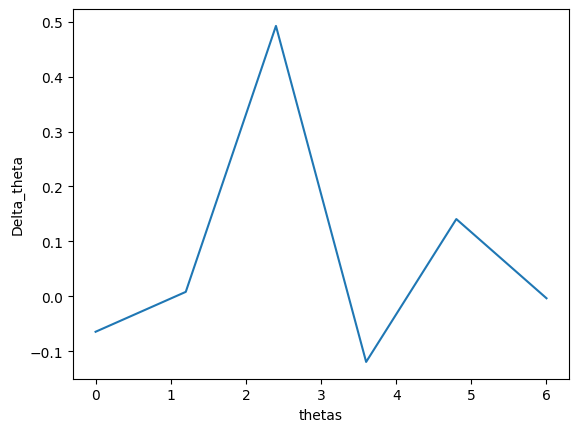

In [182]:
plt.figure()
theta = np.array([np.linspace(0,6,6)]).transpose()
time = np.linspace(0,30,45)
plt.xlabel('thetas')
plt.ylabel('Delta_theta')
plt.plot(theta,D_theta)
D_theta[3]

In [19]:
T6 = test._endeff()
T6_inv = np.linalg.inv(T6)
print( T6_inv)



[[-6.1232340e-17 -1.0000000e+00 -2.4492936e-16  5.5000000e+00]
 [-6.1232340e-17 -1.2246468e-16  1.0000000e+00 -7.9000000e+00]
 [ 1.0000000e+00 -6.1232340e-17  6.1232340e-17  2.8000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [49]:
_0T7 = T6@T7
_Tbd = T6_inv*_0T7

import scipy
mod_Vb = scipy.linalg.logm(_Tbd, disp=True)

In [58]:
# Now finding jacobian 
Jx = test._Jacobian()
Jx_inv = scipy.linalg.pinv(Jx)

T in the above case is not the transformation matrix, it is the column vector represeting POSORI 


In [92]:
# This is for end-effector-position 

Ori = np.expand_dims(oi,axis=0).transpose()
POS = np.expand_dims(end[:3],axis=0).transpose()

Position_orientation_endeff = np.append(POS,Ori)
Pos_ori_endeff = np.expand_dims(Position_orientation_endeff,axis=1)
Pos_ori_endeff

array([[-2.8000000e+00],
       [ 5.5000000e+00],
       [ 7.9000000e+00],
       [ 9.0000000e+01],
       [-7.0167093e-15],
       [-9.0000000e+01]])

In [95]:
# Now for new position 
_0T7[:,3][:3]

(3,)